# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
! wget https://raw.githubusercontent.com/VictoriaLiendro/drug-analysis-tutorial/refs/heads/main/data/erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-12-23 15:54:29--  https://raw.githubusercontent.com/VictoriaLiendro/drug-analysis-tutorial/refs/heads/main/data/erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155232 (152K) [text/plain]
Saving to: ‘erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

erbB1_06_bioactivit 100%[===================>] 151.59K  --.-KB/s    in 0.02s   

2024-12-23 15:54:29 (6.32 MB/s) - ‘erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [155232/155232]



In [3]:
df = pd.read_csv('erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.154902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.100000
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.900000
78,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
79,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.838632


## **3. Input features**
The ***erbB1*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
78,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

,pIC50
0,4.000000
1,4.000000
2,4.000000
3,4.602060
4,7.154902
...,...
76,3.100000
77,3.900000
78,3.000000
79,5.838632


### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(81, 881)

In [8]:
Y.shape

(81,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(81, 150)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((64, 150), (64,))

In [13]:
X_test.shape, Y_test.shape

((17, 150), (17,))

## **5. Building a Regression Model using Random Forest**

In [23]:
import numpy as np
np.random.seed(3)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3138369877439786

In [24]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

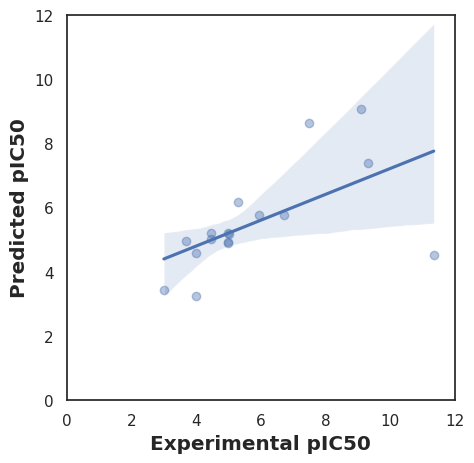

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show